R + Stan + Jupyter Notebookのテスト
===
---
https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started-(Japanese)#%E4%BE%8B-1-eight-schools
をやってみる

In [1]:
library(rstan)

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [2]:
schools_dat <- list(J = 8,
                    y = c(28,  8, -3,  7, -1,  1, 18, 12),
                    sigma = c(15, 10, 16, 11,  9, 11, 10, 18))

In [3]:
fit <- stan(file = '8schools.stan', data = schools_dat,
            iter = 1000, chains = 4)

In file included from file6361283ab349.cpp:8:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core.hpp:12:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5:
In file included from /usr/local/lib/R/3.4/site-library/StanHeaders/include/stan/math/rev/core/var.hpp:7:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/math/tools/config.hpp:13:
In file included from /usr/local/lib/R/3.4/site-library/BH/include/boost/config.hpp:39:
/usr/local/lib/R/3.4/site-library/BH/include/boost/config/compiler/clang.hpp:200:11: warning: 'BOOST_NO_CXX11_RVALUE_REFERENCES' macro re

Inference for Stan model: 8schools.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu         7.91    0.17 4.93  -2.00   4.75   7.86  11.01  18.10   834 1.00
tau        7.17    0.46 7.03   0.30   2.68   5.55   9.35  23.91   236 1.01
eta[1]     0.37    0.02 0.94  -1.49  -0.24   0.38   1.02   2.16  1691 1.00
eta[2]     0.00    0.02 0.86  -1.72  -0.54   0.00   0.53   1.73  2000 1.00
eta[3]    -0.21    0.02 0.91  -1.98  -0.82  -0.19   0.40   1.58  1714 1.00
eta[4]    -0.01    0.02 0.86  -1.71  -0.56   0.00   0.57   1.66  2000 1.00
eta[5]    -0.38    0.02 0.84  -2.03  -0.91  -0.41   0.13   1.32  2000 1.00
eta[6]    -0.21    0.02 0.88  -1.96  -0.77  -0.23   0.34   1.60  2000 1.00
eta[7]     0.34    0.02 0.86  -1.28  -0.23   0.33   0.91   2.00  1812 1.00
eta[8]     0.02    0.02 0.95  -1.87  -0.62   0.04   0.64   1.96  1813 1.00
theta[1]  11.28    0.23

'pars' not specified. Showing first 10 parameters by default.
ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


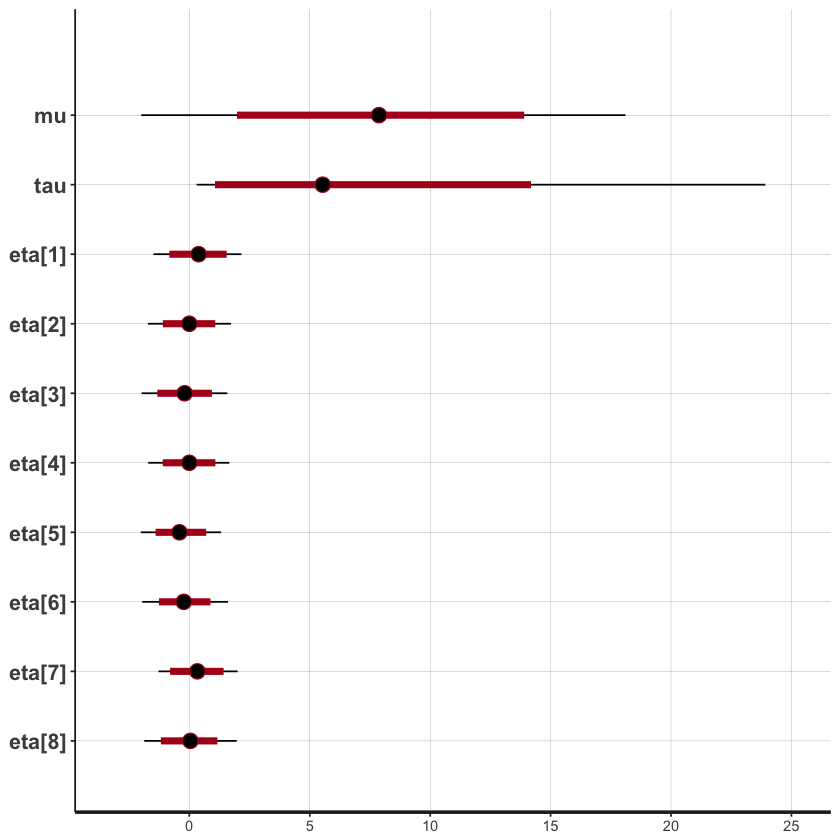

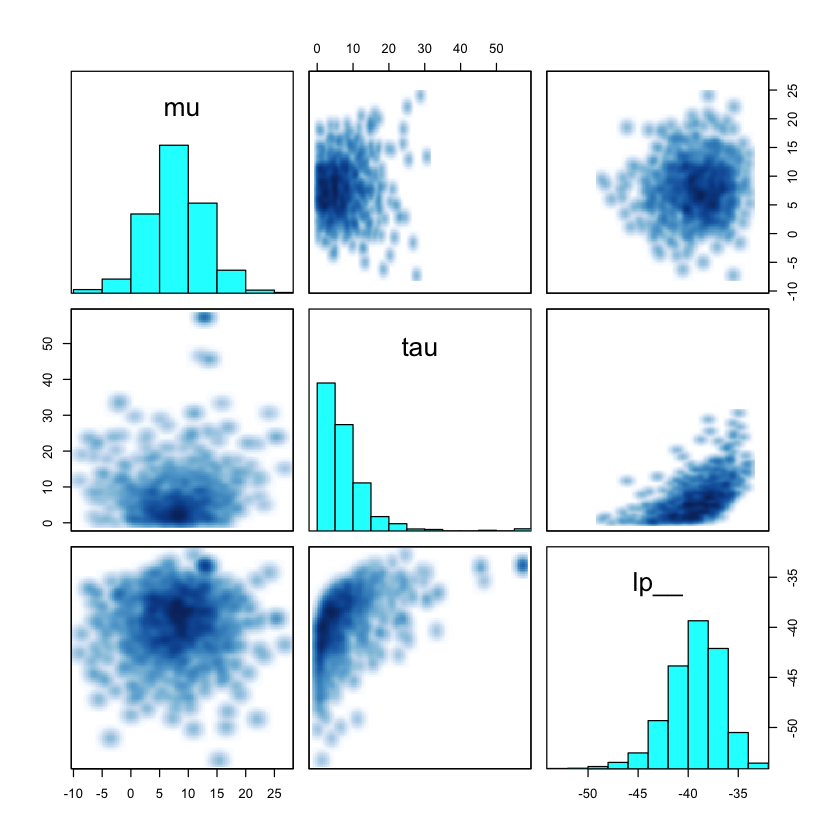

In [4]:
print(fit)
plot(fit)
pairs(fit, pars = c("mu", "tau", "lp__"))

la <- extract(fit, permuted = TRUE) # arraysのlistを返す
mu <- la$mu

### iterations, chains, parametersの3次元arrayを返す
a <- extract(fit, permuted = FALSE)

### stanfitオブジェクトにS3関数のas.array（やas.matrix）を使う
a2 <- as.array(fit)
m <- as.matrix(fit)

In [5]:
print(fit, digits = 1)

Inference for Stan model: 8schools.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean  sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
mu         7.9     0.2 4.9  -2.0   4.8   7.9  11.0  18.1   834    1
tau        7.2     0.5 7.0   0.3   2.7   5.5   9.4  23.9   236    1
eta[1]     0.4     0.0 0.9  -1.5  -0.2   0.4   1.0   2.2  1691    1
eta[2]     0.0     0.0 0.9  -1.7  -0.5   0.0   0.5   1.7  2000    1
eta[3]    -0.2     0.0 0.9  -2.0  -0.8  -0.2   0.4   1.6  1714    1
eta[4]     0.0     0.0 0.9  -1.7  -0.6   0.0   0.6   1.7  2000    1
eta[5]    -0.4     0.0 0.8  -2.0  -0.9  -0.4   0.1   1.3  2000    1
eta[6]    -0.2     0.0 0.9  -2.0  -0.8  -0.2   0.3   1.6  2000    1
eta[7]     0.3     0.0 0.9  -1.3  -0.2   0.3   0.9   2.0  1812    1
eta[8]     0.0     0.0 1.0  -1.9  -0.6   0.0   0.6   2.0  1813    1
theta[1]  11.3     0.2 8.3  -2.7   5.8  10.3  15.5  31.0  1355    1
theta[2]   7.9     0.1 6.2  -3.9